# IPCC AR6 Interactive Atlas Datalab

***

> This notebook is a reproducibility example of the IPCC-WGI AR6 Interactive Atlas products. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Projected climate change signals and uncertainty under global warming levels

**M. Iturbide** (Santander Meteorology Group. Instituto de Física de Cantabria, CSIC-UC, Santander, Spain).

This notebook is a **reproducibility example for the [**IPCC-WGI AR6 Interactive Atlas**](https://interactive-atlas.ipcc.ch/) products. 

This notebook works with the data available in this Hub. In particular, the **IPCC-WGI AR6 Interactive Atlas Dataset**, originally published at [**DIGITAL.CSIC**](https://digital.csic.es/handle/10261/280324) for the long-term archival, and also available through the **[Copernicus Data Store (CDS)](https://cds.climate.copernicus.eu/datasets/projections-climate-atlas?tab=overview)**.

Open the **`Getting_started.ipynb`** for a **description of the available data** and for a quick **introduction to the **[climate4R framework](https://github.com/SantanderMetGroup/climate4R)**, the bundle of R packages used in this notebook.


### Contents in this notebook
1) Libraries
2) The Global Warming Level analysis dimension
3) Data loading for the different GWLs
4) Data loading for the historical reference
5) Uncertainty calculation and representation
6) Application of a land-sea mask
7) Generate regionalized information
***

Before we start, or at any stage of the notebook, we can customize the plotting area within this notebook as follows:

In [1]:
library(repr)
# Change plot size 
options(repr.plot.width=18, repr.plot.height=8)

***

### 1. Libraries

The core ***climate4R*** libraries that allow for **data loading, transformation** (e.g. spatio-temporal aggregations), and **visualization** are `loadeR`, `transformeR` and `visualizeR`. In this example notebook we will also use the `geoprocessoR` package to perform spatial operations.

We will also use other useful libraries; the plotting library `lattice`, `RColorBrewer` for selecting color palettes, and the `magrittr` library for piping operations (through `%>%`).

In [2]:
library(loadeR)
library(transformeR)
library(visualizeR)
library(geoprocessoR)
#library(rgdal)
library(lattice)
library(magrittr)
library(RColorBrewer)

Loading required package: rJava

Loading required package: loadeR.java

Java version 22x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.6 (2023-06-26) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.8.1 (2023-06-22) is loaded


Get the latest stable version (1.8.2) using <devtools::install_github(c('SantanderMetGroup/climate4R.UDG','SantanderMetGroup/loadeR'))>

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded


Get the latest stable version (2.2.3) using <devtools::install_github('SantanderMetGroup/transformeR')>

Please see 'citation("transformeR")' to cite this package.

visualizeR version 1.6.4 (2023-10-26) is loaded

Please see 'citation("visualizeR")' to cite this package.

Please note that rgdal will be retired during October 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html and https://github.com/r-spatial/evolution
rgdal: version: 1.6-7, (SVN revision 1203)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.8.5, released 2024/04/02
Path to GDAL shared files: /opt/conda/envs/climate4r/share/gdal
 GDAL does not use iconv for recoding strings.
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 9.4.0, March 1st, 2024, [PJ_VERSION: 940]
Path to PROJ shared files: /home/jovyan/.l

### 2. The Global Warming Level analysis dimension

Instead of calculating climate change anomalies over a fixed period, we will compute the anomaly based on a specific level of global warming (GWL). To achieve this, we need the information on the **time windows during which global surface temperature reaches various levels of warming**.

This data is available at the [**IPCC-WGI/Atlas GitHub repository**](https://github.com/IPCC-WG1/Atlas/tree/main/warming-levels). Specifically, we require the information in the `CMIP6_Atlas_WarmingLevels.csv` file, as we will be working with climate projections from CMIP6.

We can read the file remotely as follows:

In [4]:
url <- "https://github.com/SantanderMetGroup/ATLAS/raw/refs/heads/main/warming-levels/CMIP6_Atlas_WarmingLevels.csv"
gwls <- read.csv(url)
str(gwls)

'data.frame':	35 obs. of  17 variables:
 $ model_run  : chr  "ACCESS-CM2_r1i1p1f1" "ACCESS-ESM1-5_r1i1p1f1" "AWI-CM-1-1-MR_r1i1p1f1" "BCC-CSM2-MR_r1i1p1f1" ...
 $ X1.5_ssp126: int  2027 2030 2022 2041 NA 2013 2026 2021 2023 2027 ...
 $ X2_ssp126  : int  2042 2072 2050 NA NA 2025 2042 2038 2037 2058 ...
 $ X3_ssp126  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ X4_ssp126  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ X1.5_ssp245: int  2028 2029 2020 2035 2055 2012 2028 2024 2024 2030 ...
 $ X2_ssp245  : int  2040 2045 2039 2057 2088 2023 2042 2039 2038 2048 ...
 $ X3_ssp245  : int  2070 NA NA NA NA 2049 2078 2075 2066 2084 ...
 $ X4_ssp245  : int  NA NA NA NA NA 2083 NA NA NA NA ...
 $ X1.5_ssp370: int  2027 2033 2021 2032 2046 2012 2030 2027 2025 2032 ...
 $ X2_ssp370  : int  2039 2048 2037 2046 2065 2023 2043 2041 2039 2045 ...
 $ X3_ssp370  : int  2062 2069 2064 2074 NA 2043 2068 2063 2063 2066 ...
 $ X4_ssp370  : int  2082 NA NA NA NA 2059 2087 2085 2087 2083 ...
 $ X1.5_ssp585: int  2

In this example, we will focus on the **+3ºC GWL**. We will use the `ssp585` scenario, though any other scenario could be used, as the anomalies do not vary significantly across scenarios when analyzed through the GWL framework.

In [5]:
gwl3 <- gwls[,c("model_run", "X3_ssp585")] %>% print

                   model_run X3_ssp585
1        ACCESS-CM2_r1i1p1f1      2055
2     ACCESS-ESM1-5_r1i1p1f1      2060
3     AWI-CM-1-1-MR_r1i1p1f1      2059
4       BCC-CSM2-MR_r1i1p1f1      2065
5       CAMS-CSM1-0_r2i1p1f1      2088
6           CanESM5_r1i1p1f1      2040
7             CESM2_r4i1p1f1      2055
8       CESM2-WACCM_r1i1p1f1      2053
9      CMCC-CM2-SR5_r1i1p1f1      2052
10       CNRM-CM6-1_r1i1p1f2      2058
11    CNRM-CM6-1-HR_r1i1p1f2      2051
12      CNRM-ESM2-1_r1i1p1f2      2064
13        EC-Earth3_r1i1p1f1      2057
14    EC-Earth3-Veg_r1i1p1f1      2050
15 EC-Earth3-Veg-LR_r1i1p1f1      9999
16        FGOALS-g3_r1i1p1f1      2072
17         GFDL-CM4_r1i1p1f1      2059
18        GFDL-ESM4_r1i1p1f1      2075
19  HadGEM3-GC31-LL_r1i1p1f3      2047
20         IITM-ESM_r1i1p1f1      2075
21        INM-CM4-8_r1i1p1f1      2069
22        INM-CM5-0_r1i1p1f1      2074
23     IPSL-CM6A-LR_r1i1p1f1      2050
24       KACE-1-0-G_r2i1p1f1      2042
25        KIOST-ESM_r1i1p

Object `gwl3` is a data frame containing the **central year in a time window of 20 years where the +3ºC GWL is reached for each model** (Find more information in the IPCC-WGI/Atlas repository). 

### 3. Data loading for the different GWLs

Before we load the data we can do an inventory with the function `dataInventory` by pointing to the NcML catalog corresponding to CMIP6 and ssp585. Open the **`Getting_started.ipynb` for a more detailed explanation of the available data and catalogs**. As we are interested in mean precipitation we will check the information for this particular variable.

In [7]:
df <- read.csv("../../inventory.csv")
subset <- subset(df, project == "CMIP6" & variable == "pr" & experiment == "ssp585" & type == "opendap")
location <- subset$location

In [8]:
di <- dataInventory(location)
str(di$pr)

[2024-09-27 17:42:27.62176] Doing inventory ...

[2024-09-27 17:42:27.704933] Opening dataset...

[2024-09-27 17:42:28.809451] The dataset was successfuly opened

[2024-09-27 17:42:29.288088] Retrieving info for 'pr' (0 vars remaining)

[2024-09-27 17:42:29.402136] Done.



List of 7
 $ Description: chr "Monthly mean of daily accumulated precipitation"
 $ DataType   : chr "float"
 $ Shape      : int [1:4] 33 1032 180 360
 $ Units      : chr "mm"
 $ DataSizeMb : num 8827
 $ Version    : logi NA
 $ Dimensions :List of 4
  ..$ member:List of 3
  .. ..$ Type  : chr "Ensemble"
  .. ..$ Units : chr ""
  .. ..$ Values: chr [1:33] "CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1" "CSIRO_ACCESS-ESM1-5_r1i1p1f1" "BCC_BCC-CSM2-MR_r1i1p1f1" "CAMS_CAMS-CSM1-0_r2i1p1f1" ...
  ..$ time  :List of 4
  .. ..$ Type      : chr "Time"
  .. ..$ TimeStep  : chr "30.436 days"
  .. ..$ Units     : chr "days since 1850-01-01 00:00:00"
  .. ..$ Date_range: chr "2015-01-01T00:00:00Z - 2100-12-01T00:00:00Z"
  ..$ lat   :List of 5
  .. ..$ Type       : chr "Lat"
  .. ..$ Units      : chr "degrees_north"
  .. ..$ Values     : num [1:180] -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 -81.5 -80.5 ...
  .. ..$ Shape      : int 180
  .. ..$ Coordinates: chr "lat"
  ..$ lon   :List of 5
  .. ..$ Type   

Now the member (model) information can be extracted and the model mathcing between GWL information and the data array can be performed. In other words, we need to obtain an index object providing the model position in the data for each of the rows in object `gwl3`. We can do this using the `grep` function in a loop

In [9]:
ind <- lapply(gwl3$model_run, grep, x = di$pr$Dimensions$member$Values) 

This index will allow us to load the data for each of the models separately, requesting a different 20-year time period each time. Before performing the data loading, common parameters such as the geographical domain, the target season, and the reference historical baseline (in this case, the pre-industrial period) can be set for simplicity. 

In [10]:
## SET PARAMETERS FOR DATA LOADING
ref.period <- 1850:1900
lonLim <- c(-10, 10)
latLim <- c(35, 55)
season <- c(12, 1, 2)

We will now **apply the `loadGridData` function within a `lapply` loop** to obtain a list of *climate4R* grids, where each slot represents a grid corresponding to a particular model. Open the **`Getting_started.ipynb` notebook for a detailed explanation of what a *climate4R* grid is**.

**The GWL period for each model is here passed to function `loadGridData`** by means of the `(gwl3$X3_ssp585[x]-9):(gwl3$X3_ssp585[x]+10)` expression, which results in a 20-year vector starting from the central year minus 9 years and ending in the central year plus 10 years (the central years are defined in the `gwl3` object created above). 

We also introduce a `tryCatch` expression to prevent the interruption of the loop in cases where models do not reach the global warming level (GWL) within the current century. Additionally, we pipe the `suppressMessages` function to avoid a long output log.

Note that **if fixed periods are considered for the analysis, the process becomes much simpler** because a loop is unnecessary, given that the period to be loaded is common to all models. Open the **`Getting_started.ipynb` notebook for the simple example** where fixed periods are used for the analysis.


In [11]:
cmip6.ssp585.l <- lapply(1:length(ind), function(x) {
    loadGridData(dataset = location,
                 var = "pr",
                 lonLim = lonLim, latLim = latLim,
                 years = (gwl3$X3_ssp585[x]-9):(gwl3$X3_ssp585[x]+10),
                 season = season,
                 members = ind[[x]]) %>% tryCatch(error = function(x) message("no data for this member and variable")) 
    }) %>% suppressMessages

We can eliminate the "no data" slots in the list as follows:

In [12]:
nodata.members <- lapply(cmip6.ssp585.l, is.null) %>% unlist %>% which
cmip6.ssp585.l <- cmip6.ssp585.l[-nodata.members]

In the next code chunk, we are performing an annual aggregation of the variable. We are also plotting a time-series plot to illustrate the concept of GWLs, where each model covers a different period.

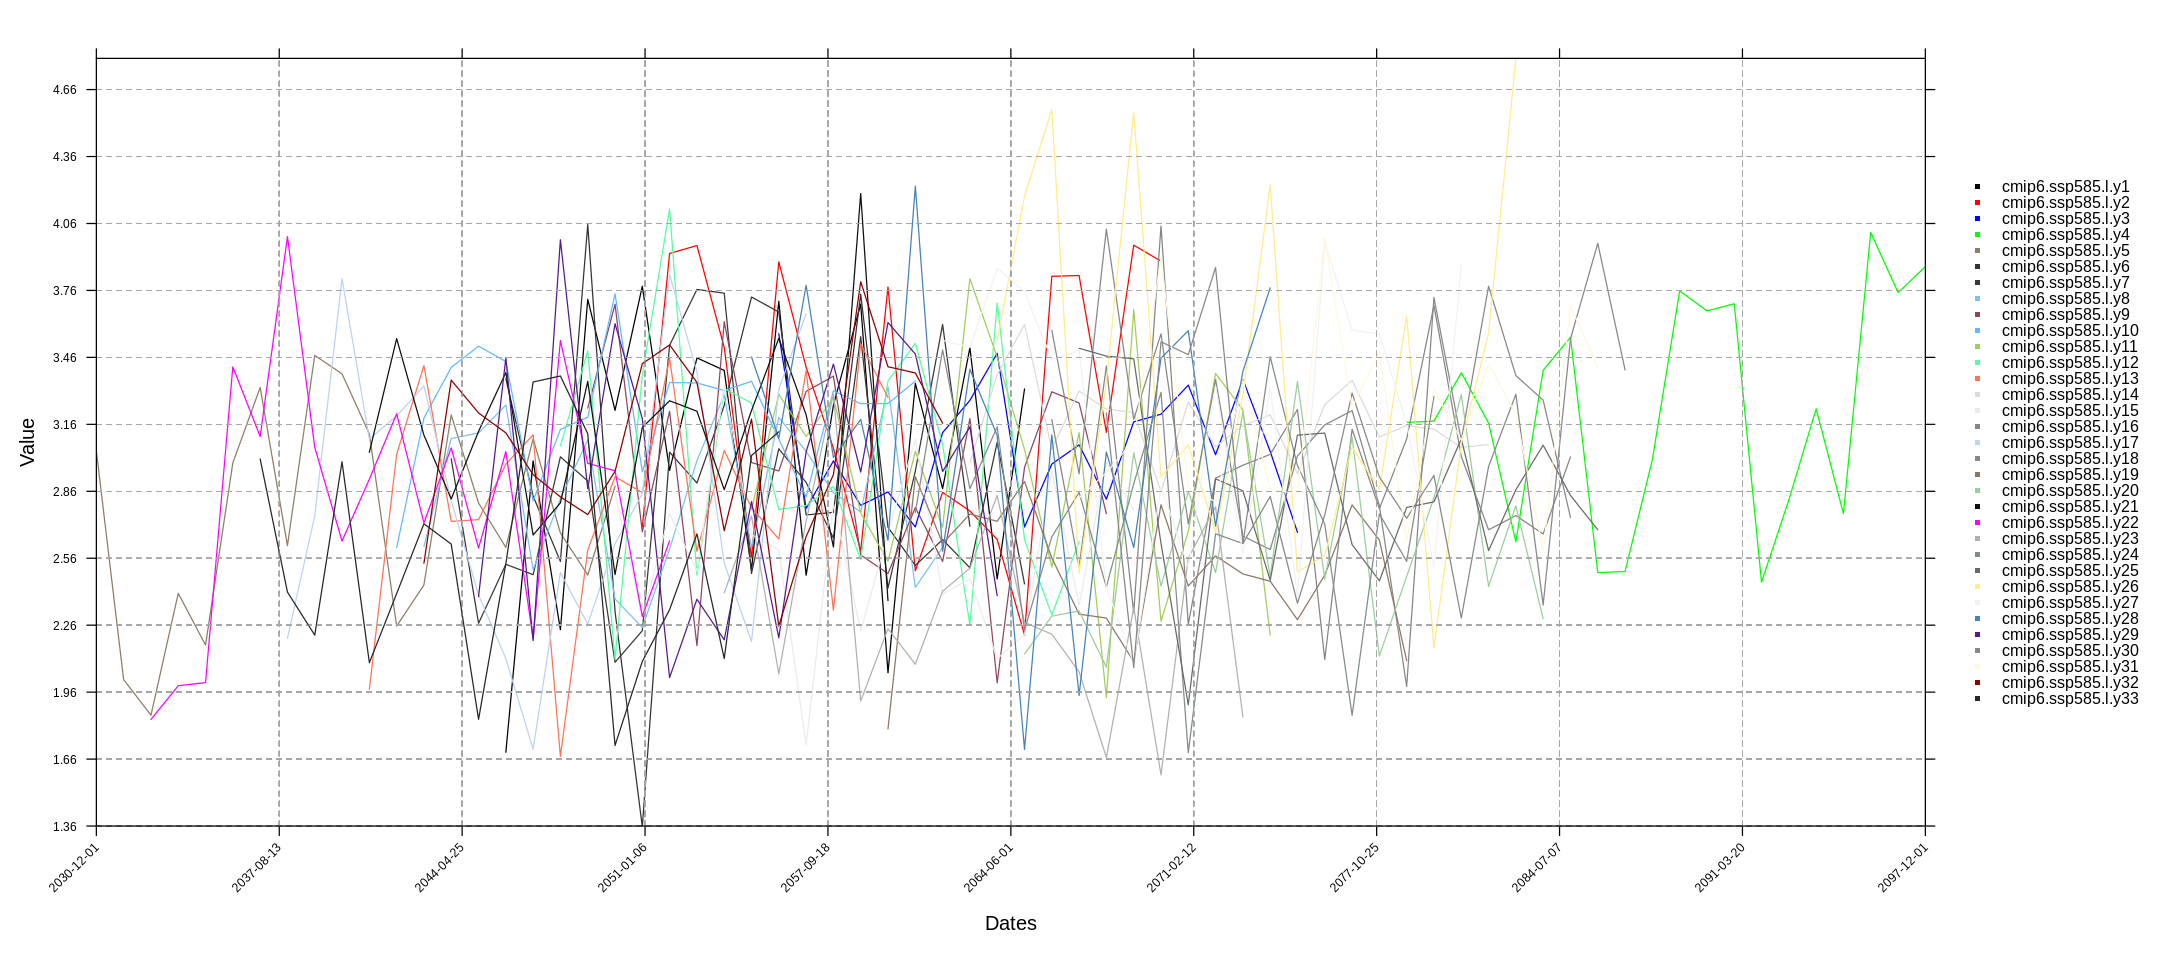

In [13]:
cmip6.ssp585.l.y <- lapply(cmip6.ssp585.l, aggregateGrid, aggr.y = list(FUN = "mean", na.rm = TRUE)) %>% suppressMessages
temporalPlot(cmip6.ssp585.l.y) %>% suppressMessages

Let's put all models in the same grid to simplify the rest of the analysis. To do so, we apply the `bindGrid` function by setting the `skip.temporal.check` parameter as `TRUE` (as each model covers a different time period). 

In [14]:
cmip6.ssp585 <- bindGrid(cmip6.ssp585.l, dimension = "member", skip.temporal.check = TRUE)

Now we plot the map with the function `spatialPlot` (note that we previously set the space of the plotting window in Jupyter). Each pannel is a member (a model).

[2024-09-27 17:46:48.269937] - Computing climatology...

[2024-09-27 17:46:48.334679] - Done.



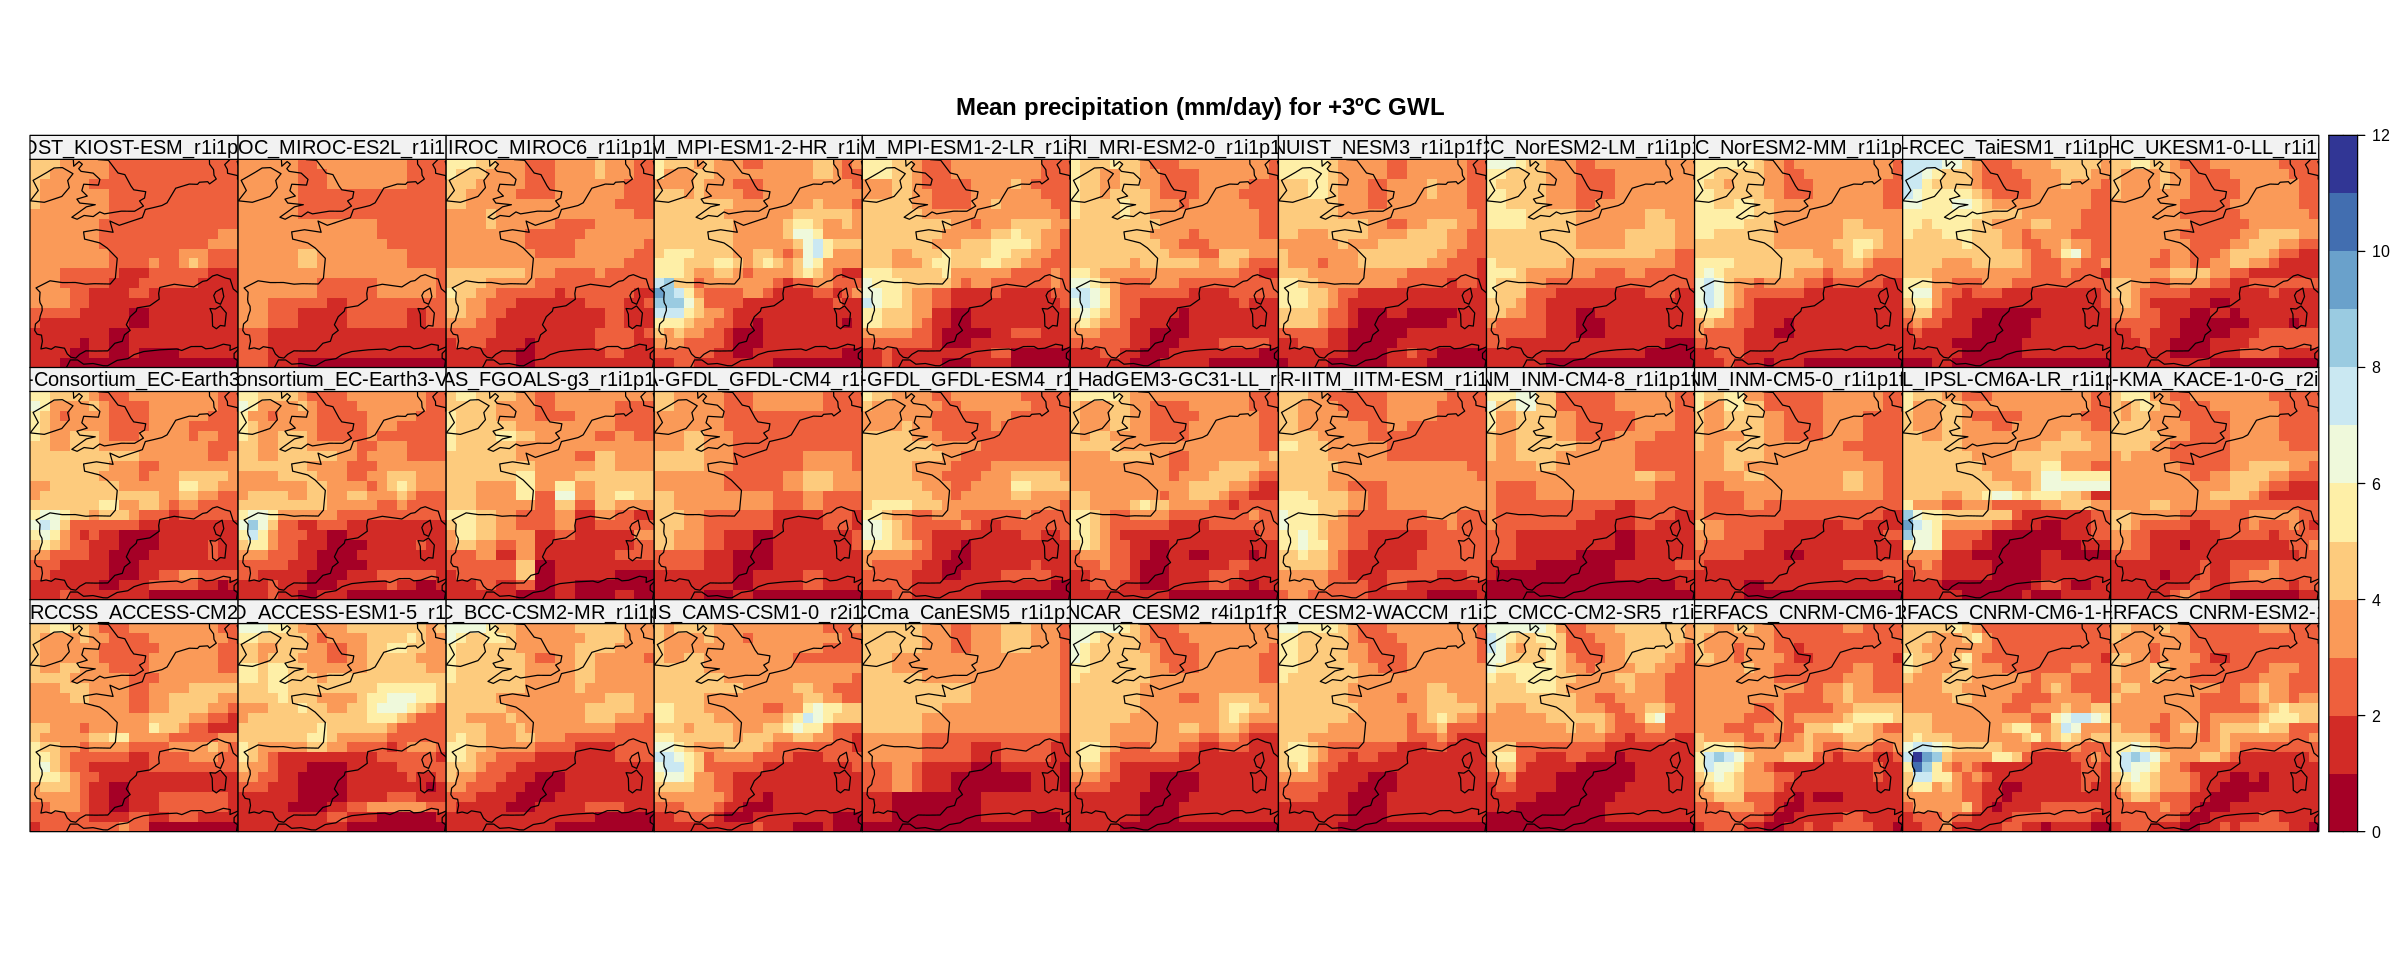

In [15]:
options(repr.plot.width=20, repr.plot.height=8)
spatialPlot(climatology(cmip6.ssp585), 
            backdrop.theme = "coastline", 
            at = seq(0, 12),
            set.max = 12, set.min = 0,
            layout = c(11, 3),
            main = "Mean precipitation (mm/day) for +3ºC GWL",
            strip = strip.custom(factor.levels = cmip6.ssp585$Members))

### 4. Data loading for the historical reference

To get the climate change signal, we first need to load data from the historical scenario (pointing to `CMIP6_historical.ncml`). As mentioned above, we are considering the pre-industrial period (object `ref.period`). In this case, the reference period is common to all models, therefore the process becomes simpler; all models are loaded at once into a single grid object and we do not need to set a loop. 

In [16]:
subset <- subset(df, project == "CMIP6" & variable == "pr" & experiment == "historical" & type == "opendap")
cmip6.hist <- loadGridData(subset$location, 
                         var = "pr", 
                         lonLim = lonLim, latLim = latLim,
                         years = ref.period, 
                         season = season)  %>% suppressWarnings

[2024-09-27 17:47:24.767892] Opening dataset...

[2024-09-27 17:47:25.281499] The dataset was successfuly opened

[2024-09-27 17:47:25.285962] Defining geo-location parameters

[2024-09-27 17:47:25.325069] Defining time selection parameters

[2024-09-27 17:47:25.348965] Retrieving data subset ...

[2024-09-27 17:47:41.580944] Done



Before continuing, we must retain the same models (in the same order) in both the future and the historical grids. To do so, we match the model names of `cmip6.ssp585` with the ones in `cmip6.hist` with the function `grep`.

In [17]:
ind.mems.hist <- lapply(cmip6.ssp585$Members, grep, x = cmip6.hist$Members) %>% unlist

In [18]:
cmip6.hist <- subsetGrid(cmip6.hist, members = ind.mems.hist)

It is always a good practice to make sure that the members in both grids are identical:

In [19]:
identical(cmip6.hist$Members, cmip6.ssp585$Members)

[1] TRUE

Now we can calculate the anomaly by computing the difference between both climatologies:

In [20]:
delta <- gridArithmetics(climatology(cmip6.ssp585), climatology(cmip6.hist), operator = "-")

[2024-09-27 17:47:41.645803] - Computing climatology...

[2024-09-27 17:47:41.713021] - Done.

[2024-09-27 17:47:41.733502] - Computing climatology...

[2024-09-27 17:47:42.024728] - Done.



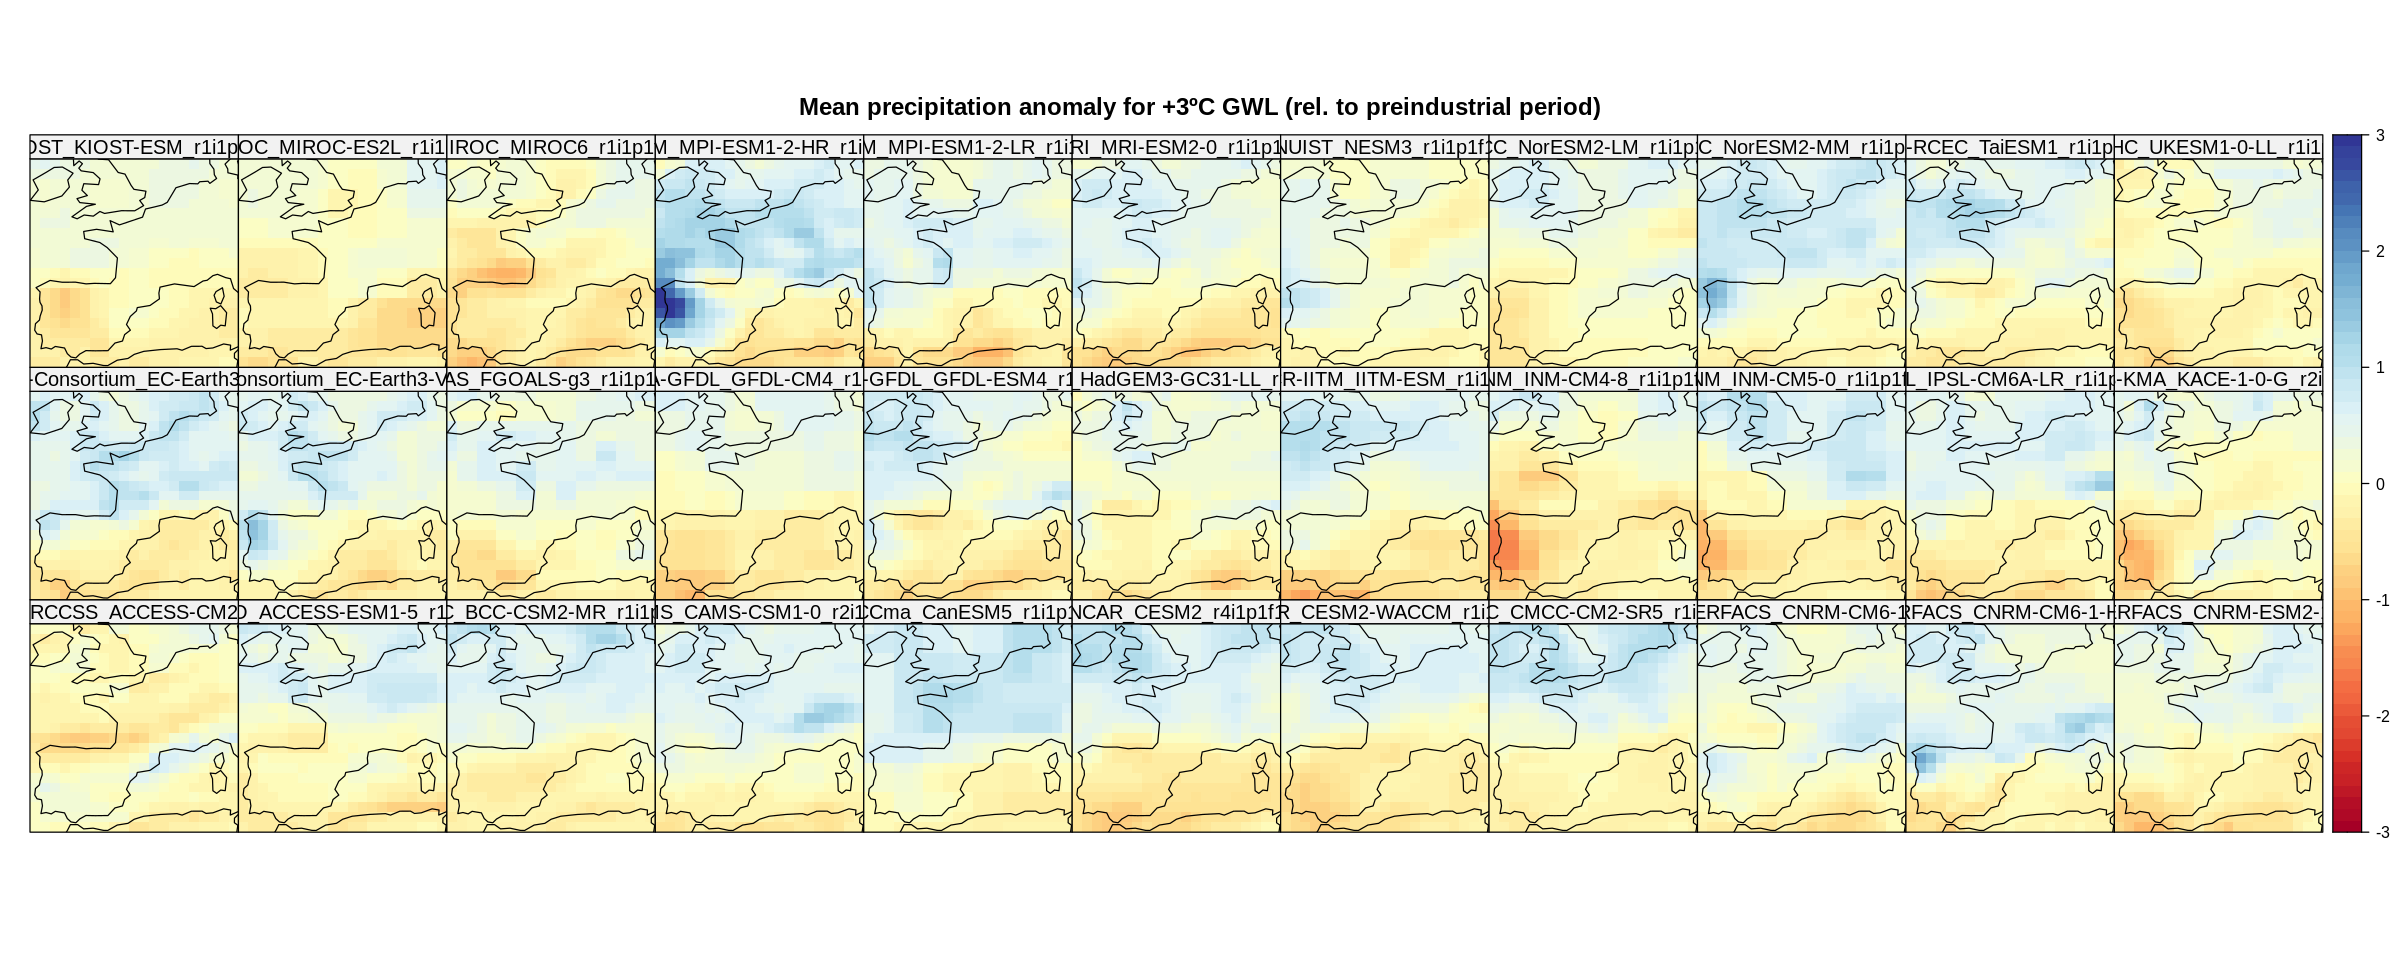

In [21]:
spatialPlot(delta, 
            backdrop.theme = "coastline", 
            at = seq(-3, 3, 0.1), 
            set.max = 3, set.min = -3,
            layout = c(11, 3),
            main = "Mean precipitation anomaly for +3ºC GWL (rel. to preindustrial period)",
            strip = strip.custom(factor.levels = delta$Members))

We can calculate the relative anomaly the same way:

In [22]:
delta.rel <- gridArithmetics(delta, climatology(cmip6.hist), 100, operator = c("/", "*"))

[2024-09-27 17:47:44.821715] - Computing climatology...

[2024-09-27 17:47:45.169835] - Done.



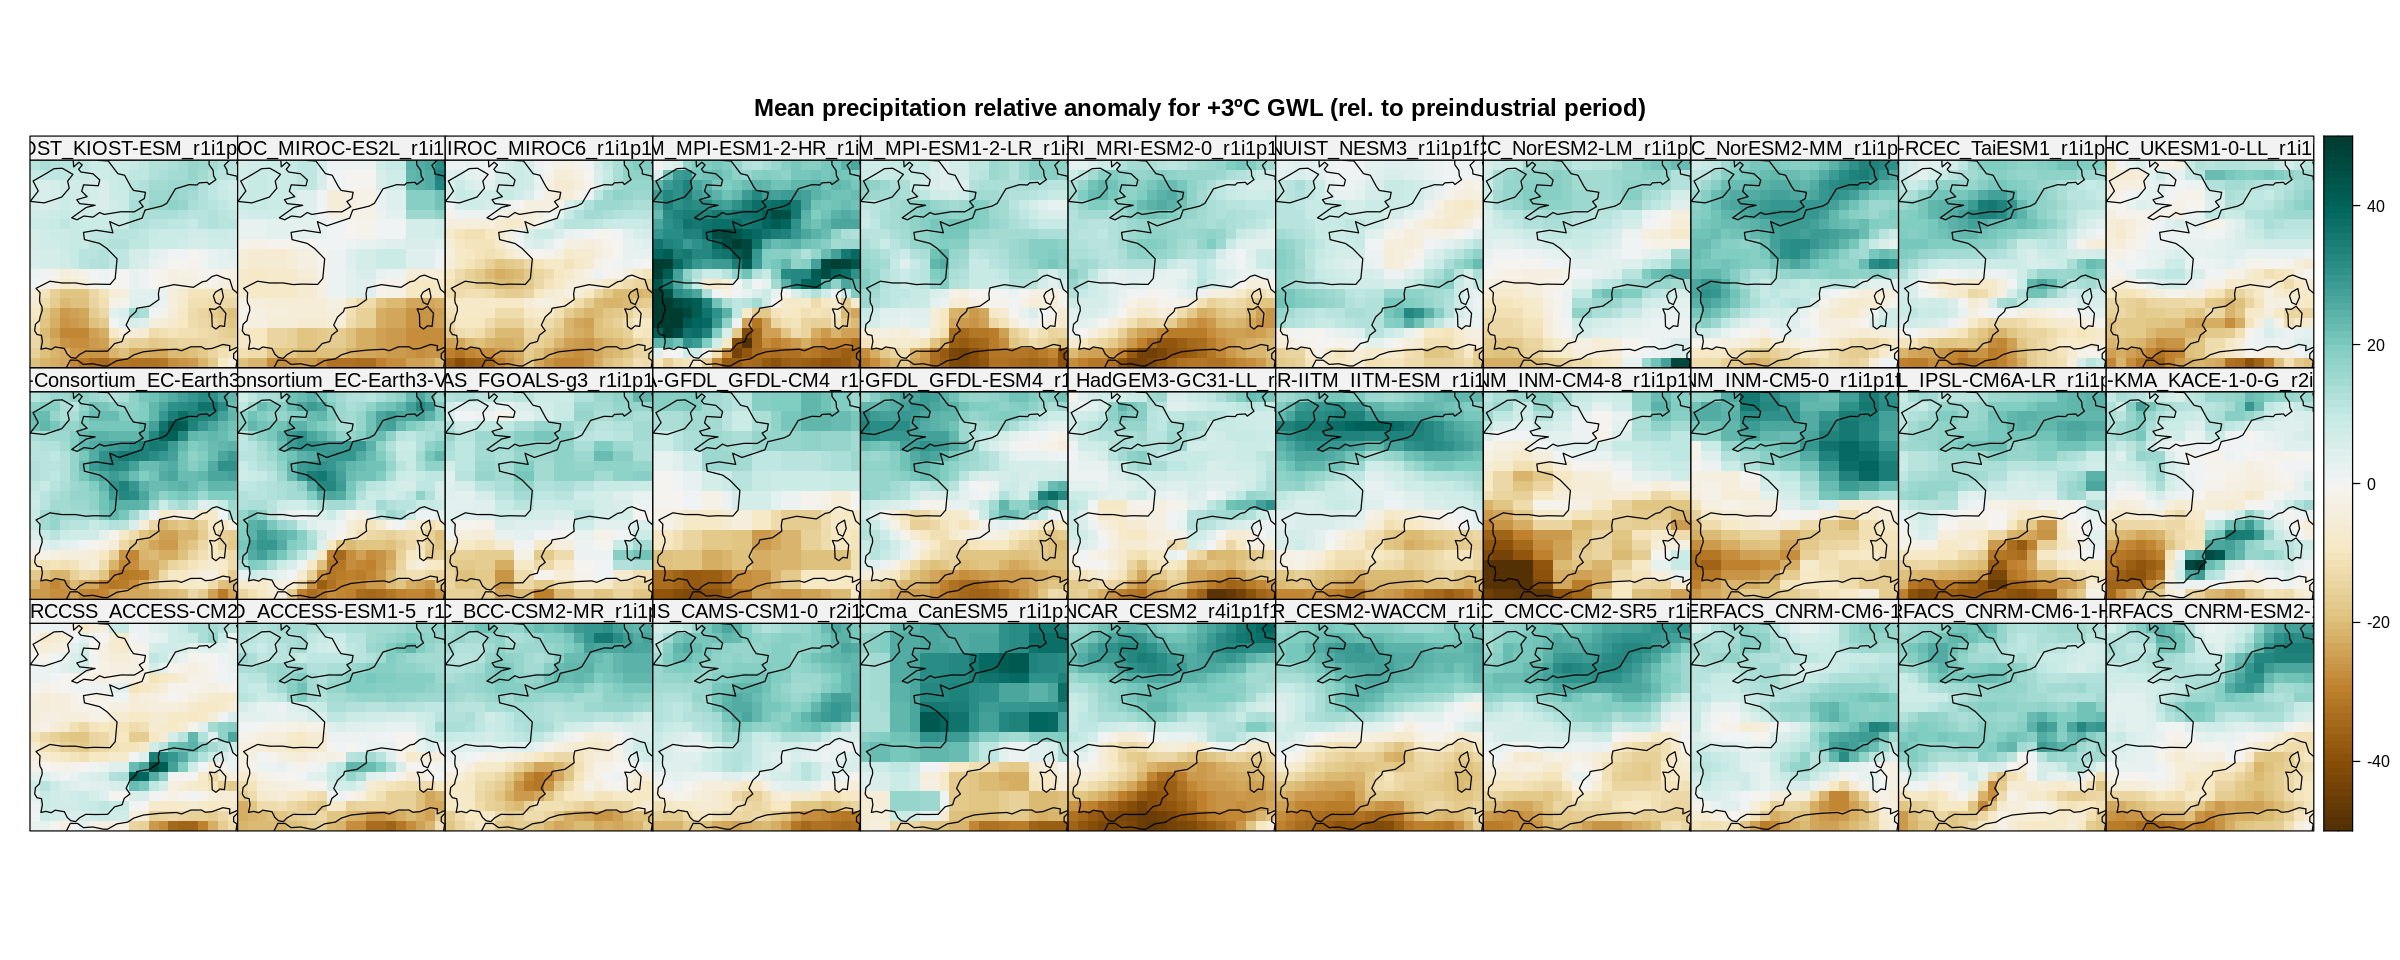

In [23]:
spatialPlot(delta.rel, 
            backdrop.theme = "coastline", 
            at = seq(-50, 50, 1), 
            set.max = 50, set.min = -50, 
            color.theme = "BrBG",
            layout = c(11, 3),
            main = "Mean precipitation relative anomaly for +3ºC GWL (rel. to preindustrial period)",
            strip = strip.custom(factor.levels = delta$Members))

To calculate the multi-model mean, use function `aggregateGrid`.

In [24]:
ens.mean <- aggregateGrid(delta.rel, aggr.mem = list(FUN = mean))

[2024-09-27 17:47:47.89229] - Aggregating members...

[2024-09-27 17:47:47.895534] - Done.



In [25]:
# Change plot size 
options(repr.plot.width=18, repr.plot.height=6)

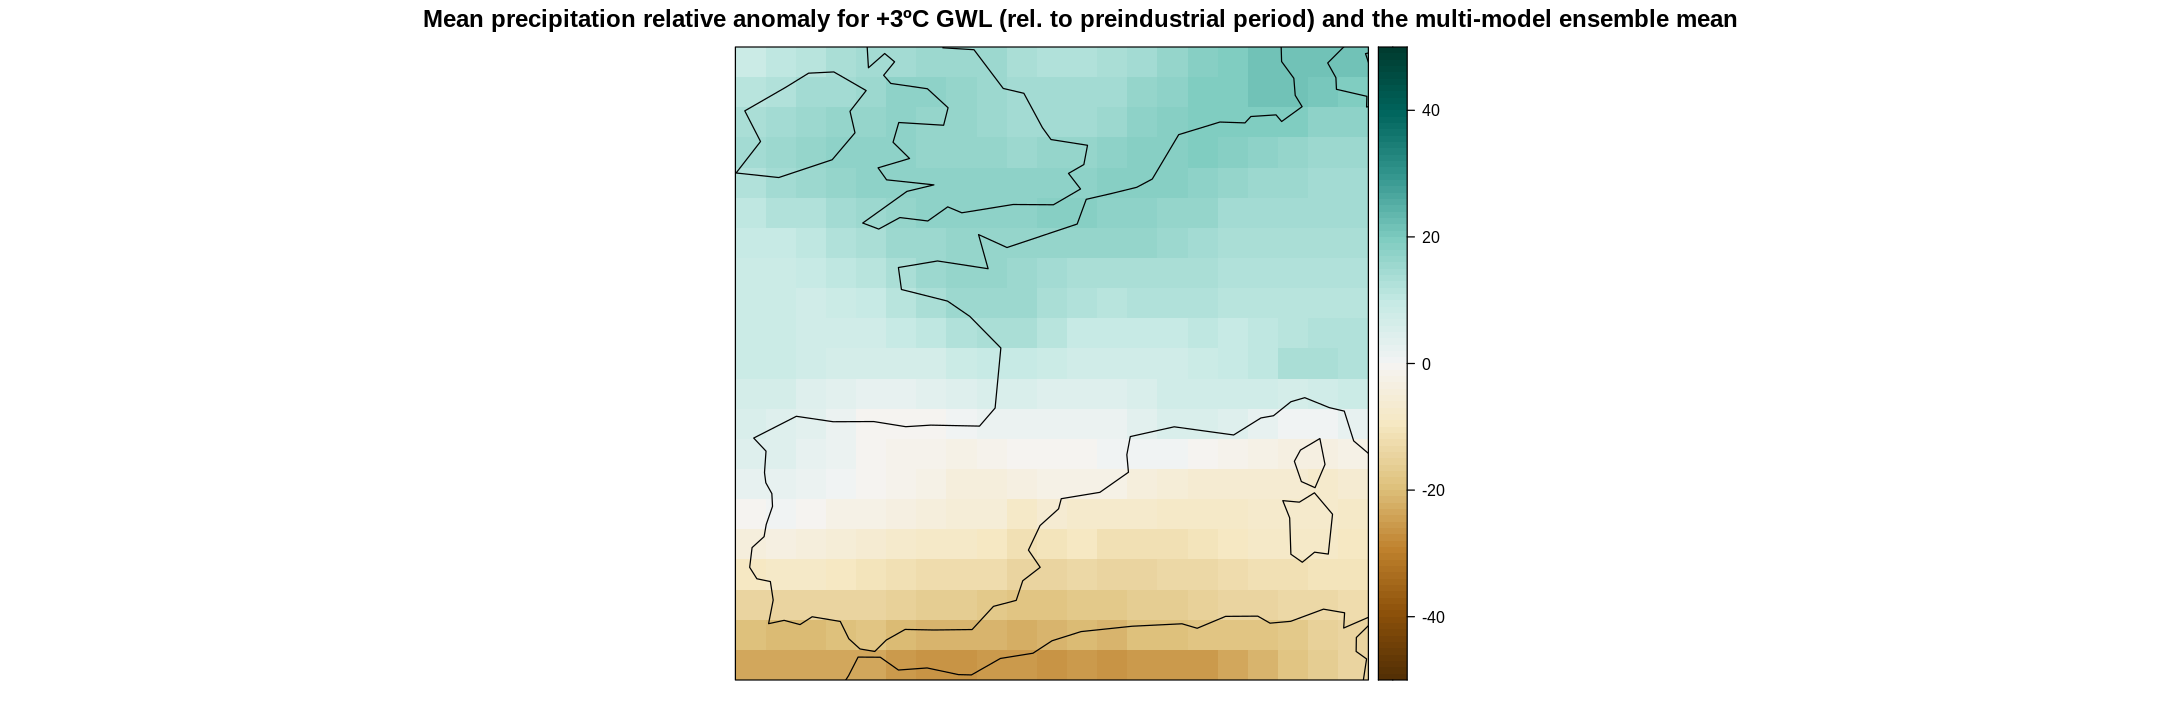

In [26]:
spatialPlot(ens.mean, 
            backdrop.theme = "coastline", 
            at = seq(-50, 50, 1), 
            set.max = 50, set.min = -50, 
            color.theme = "BrBG",
            main = "Mean precipitation relative anomaly for +3ºC GWL (rel. to preindustrial period) and the multi-model ensemble mean")

### 5. Uncertainty calculation and representation

*climate4R* implements the "simple" and "advanced" methods for the uncertainty characterization defined in the IPCC Sixth Assessment report. The function to apply is `computeUncertainty`. Please refer to the **AR6 WGI Cross-Chapter Box Atlas 1** ([Gutiérrez et al., 2021](https://www.ipcc.ch/report/ar6/wg1/chapter/atlas/)) for more information.

[2024-09-27 17:48:13.767031] - Aggregating members...

[2024-09-27 17:48:13.771167] - Done.



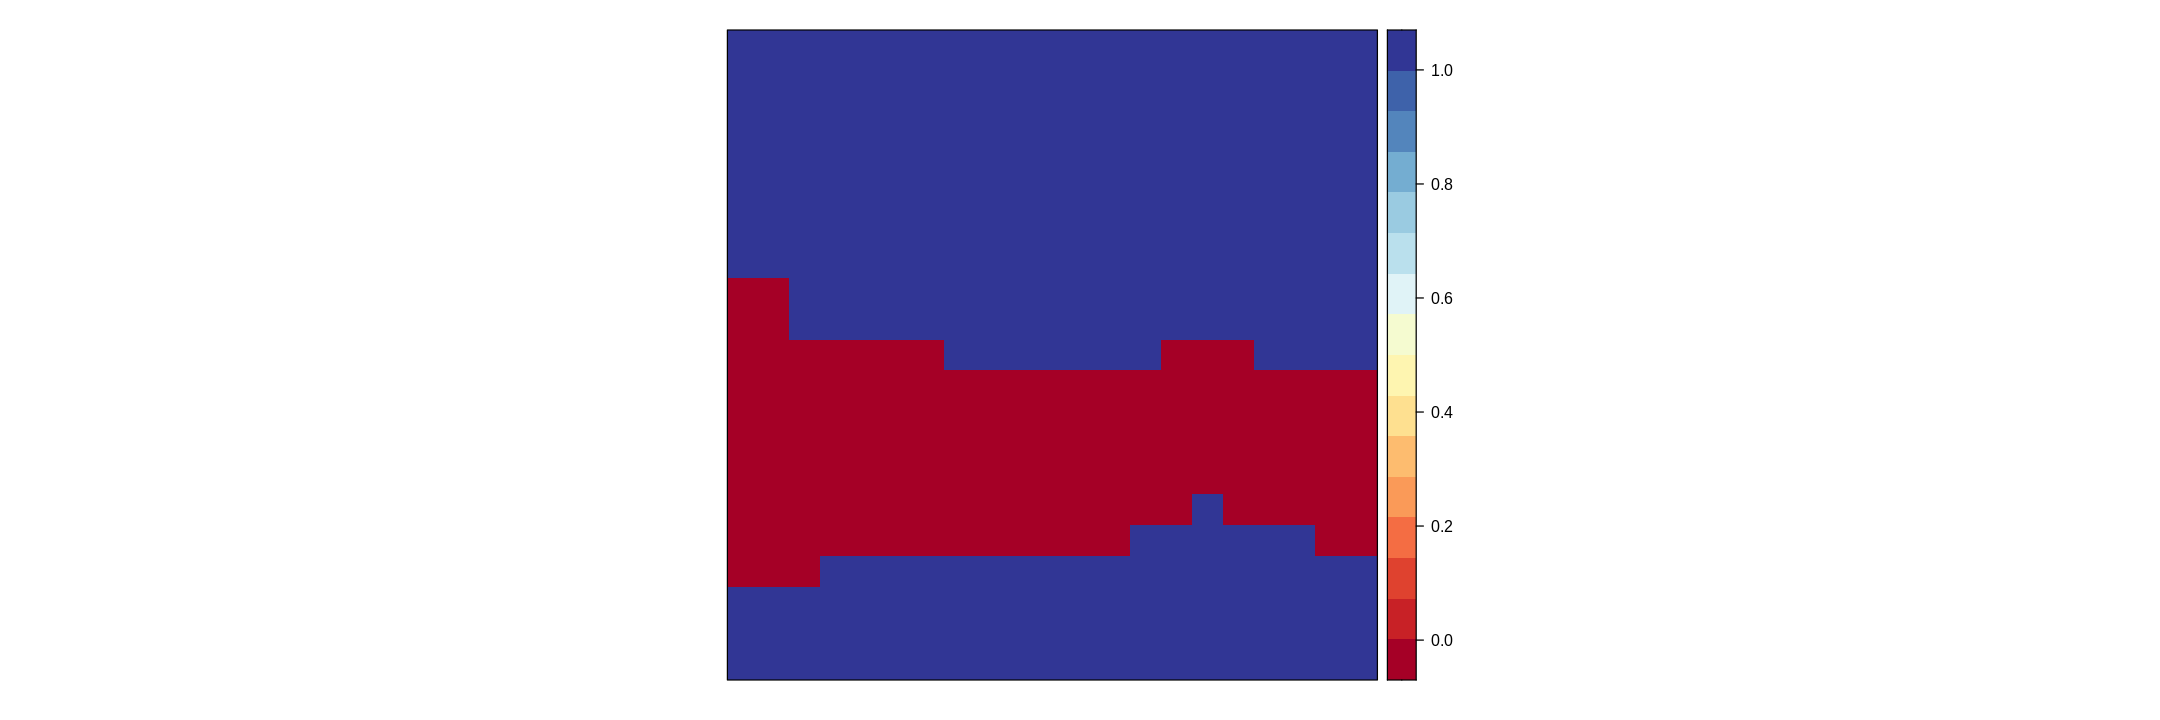

In [27]:
uncert <- computeUncertainty(historical = aggregateGrid(cmip6.hist, aggr.y = list(FUN = "mean")), 
                             anomaly = delta, 
                             method = "simple") 
spatialPlot(uncert)

The outcome yields a binary grid, readily convertible into a vectorial spatial object representing hatches. To achieve this transformation, utilize the `map.hatching` function. This function verifies a particular attribute within the grid, confirming its status as a "climatology" and ensuring that the length of the time dimension is 1. While our grid does not strictly meet the criteria of a climatology, its time dimension is singular. Therefore, we can successfully employ the function by applying the `climatology` function to our uncert object, as the values of the object remain the same.

In [28]:
cat1 <- map.hatching(clim = uncert %>% climatology, 
                     condition = "LT", 
                     threshold = 1, 
                     density = 1) %>% suppressMessages

The newly created object (`cat1`) is a list containing a `SpatialLines` object and other plotting parameters, which can be fine-tuned within the `map.hatching` function. This object can be added as a layer to our map using the `sp.layout` parameter.

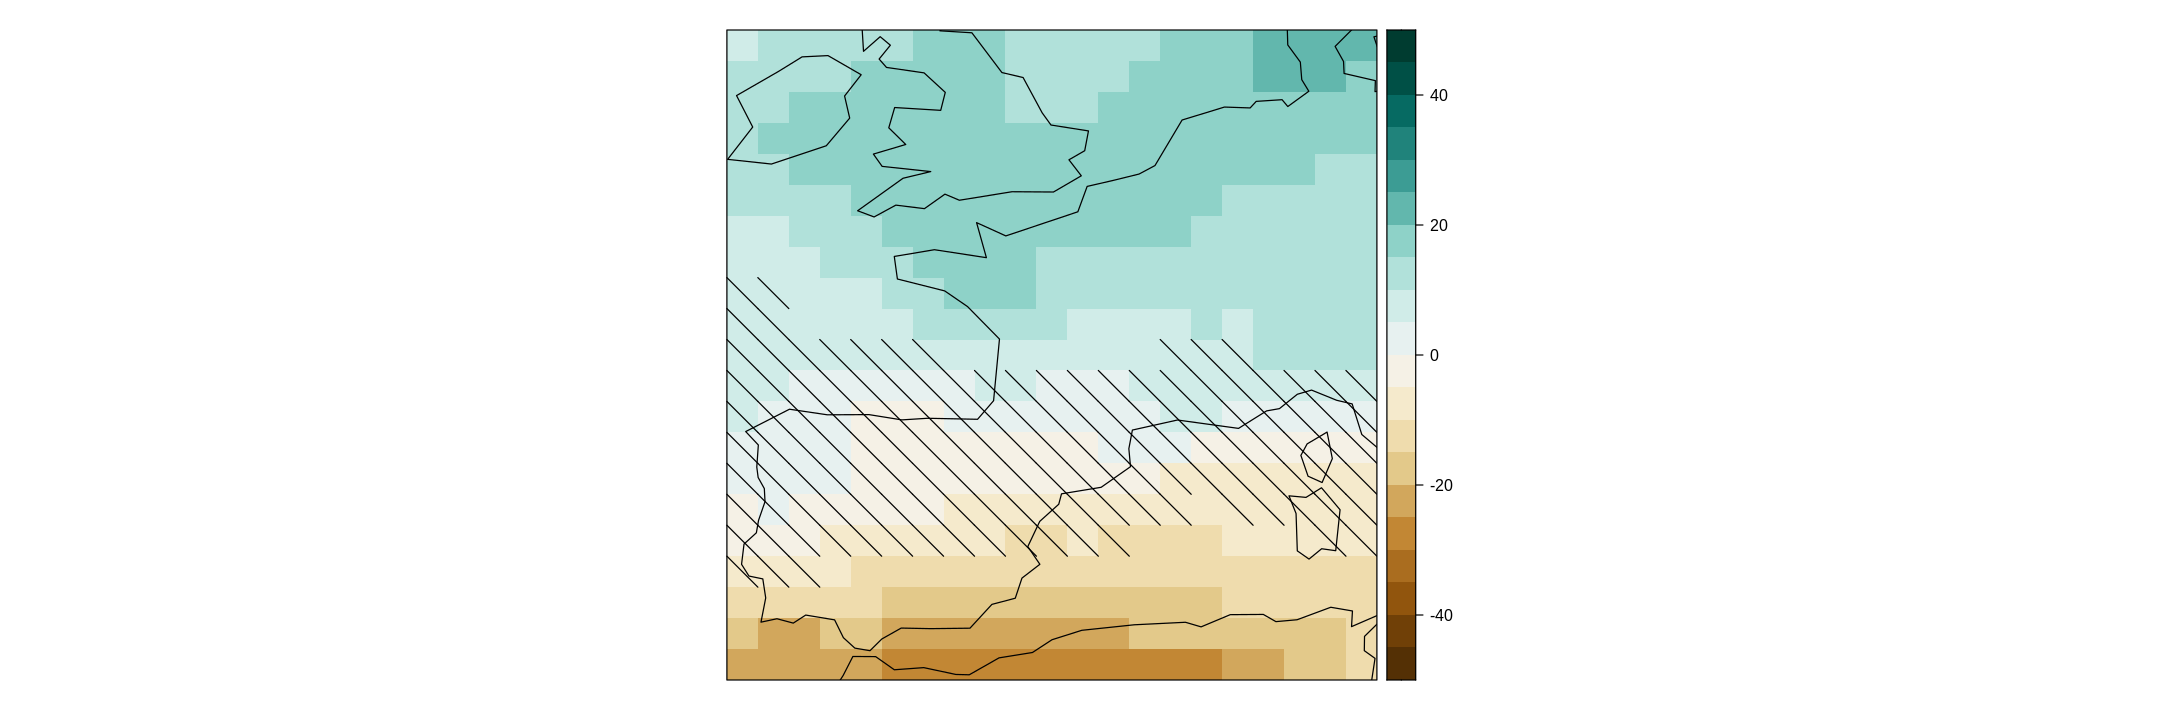

In [29]:
spatialPlot(ens.mean,
            backdrop.theme = "coastline",
            sp.layout = list(cat1),
            color.theme = "BrBG",
            set.min = -50, set.max = 50,
            at = seq(-50, 50, 5))


Now we compute the "advanced" method:

In [30]:
uncert <- computeUncertainty(historical = aggregateGrid(cmip6.hist, aggr.y = list(FUN = "mean")), 
                             anomaly = delta, 
                             method = "advanced") %>% suppressMessages
cat1 <- map.hatching(clim = uncert %>% climatology, condition = "GT", threshold = 0, density = 1) %>% suppressMessages

In [31]:
cat2 <- map.hatching(clim = uncert %>% climatology, condition = "GT", threshold = 1, density = 1, angle = "45")

[2024-09-27 17:48:19.718216] - Computing climatology...

[2024-09-27 17:48:19.723728] - Done.

NOTE: Empty selection. No hatching will be used



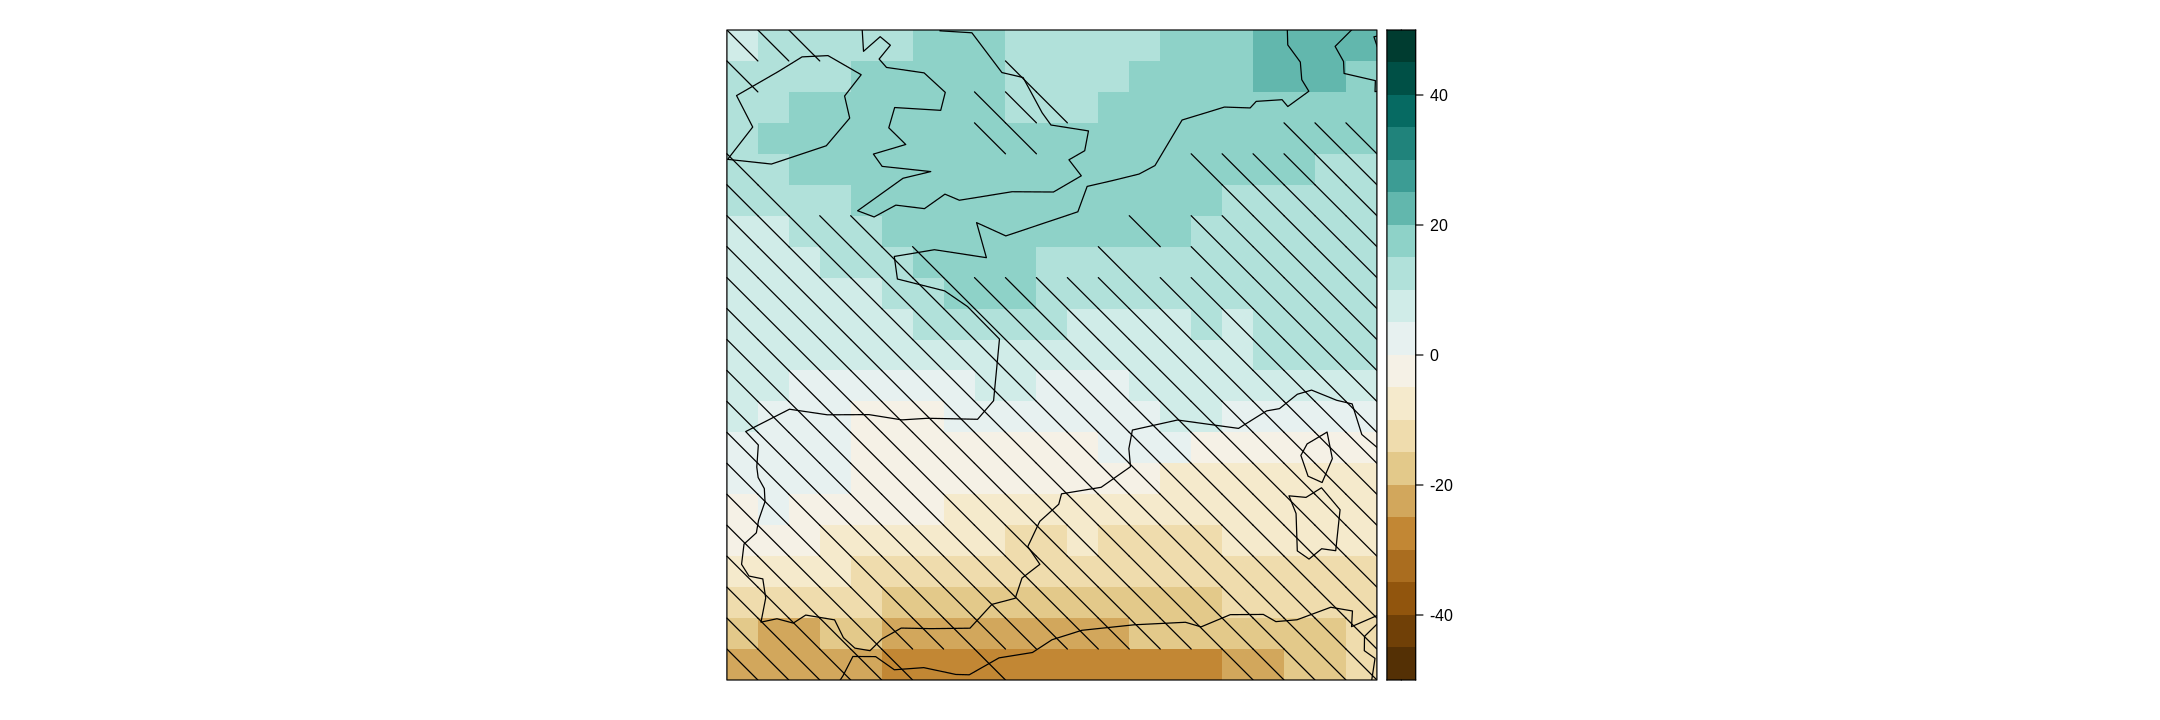

In [32]:
spatialPlot(ens.mean, 
            backdrop.theme = "coastline",
            sp.layout = list(cat1, cat2),
            color.theme = "BrBG",
            set.min = -50, set.max = 50,
            at = seq(-50, 50, 5))

### 6. Application of a land-sea mask

The land-sea masks necessary for this dataset are accessible in the IPCC-WGI/Atlas GitHub repository, which is mirrored here. Given that the CMIP6 data within the IPCC-WGI AR6 Interactive Atlas dataset adopts a consistent 1-degree grid, it is essential to reference the 1-degree mask (`land_sea_mask_1degree.nc4`) located in the `shared/repositories` folder. The variable name is "sftlf" in this case.
After loading the mask, we need to apply a threshold to the resulting grid, to make it binary (NA = sea, 1 = land).

[2024-09-27 17:48:24.189736] Defining geo-location parameters

[2024-09-27 17:48:24.220566] Defining time selection parameters

NOTE: Undefined Dataset Time Axis (static variable)

[2024-09-27 17:48:24.226113] Retrieving data subset ...

[2024-09-27 17:48:24.261283] Done



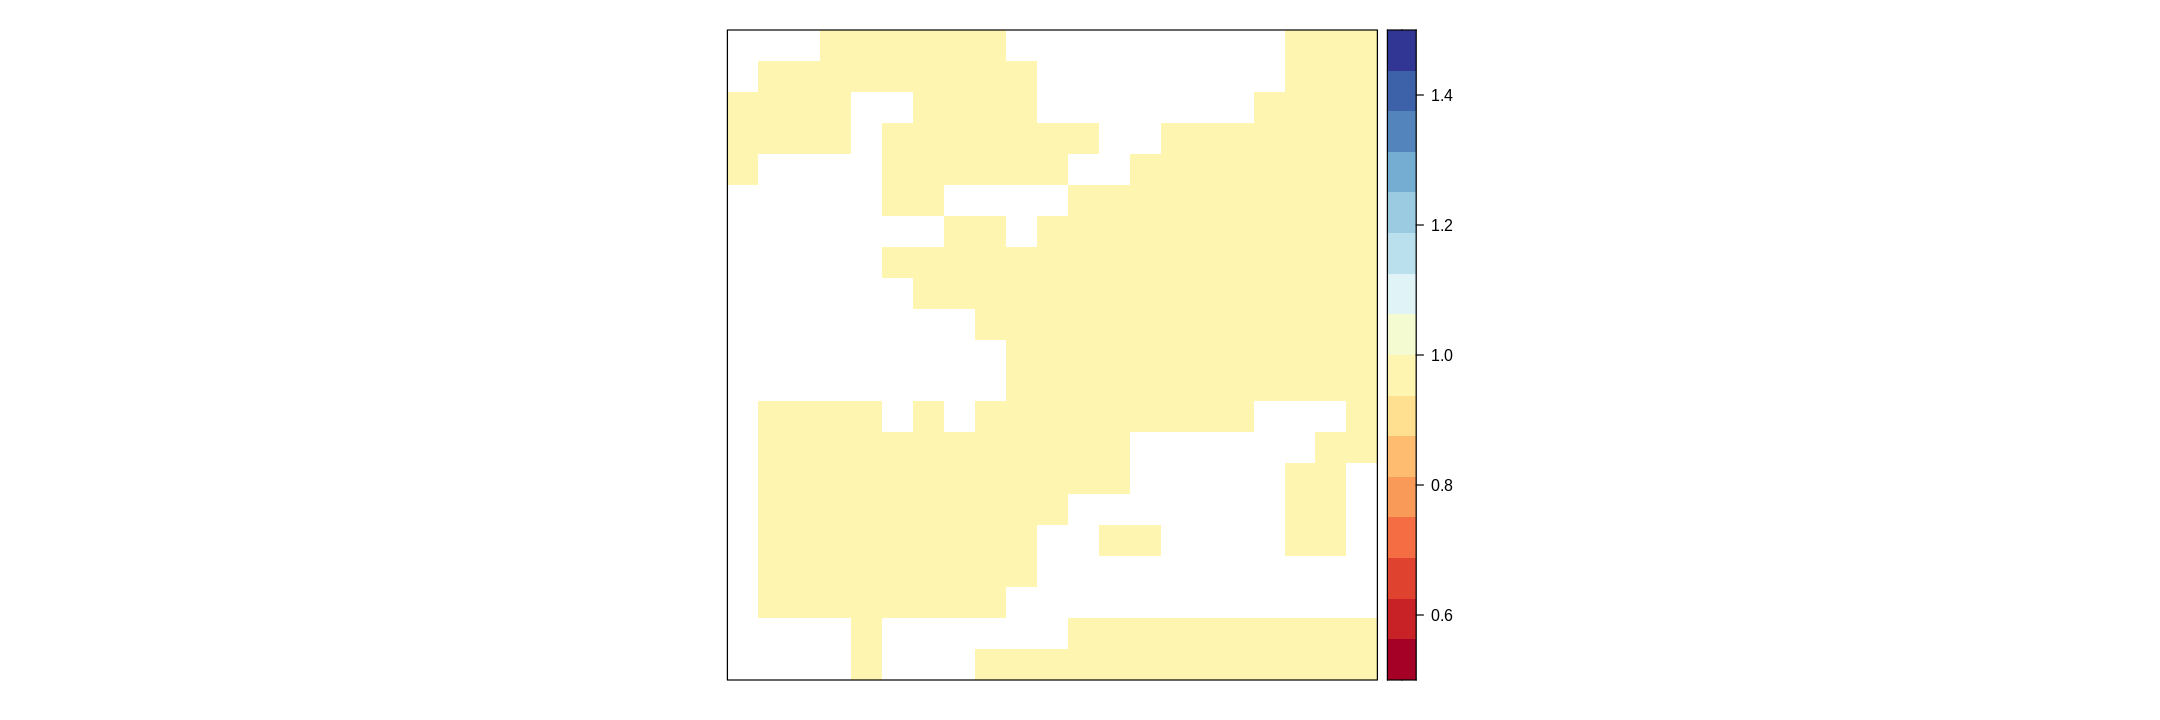

In [33]:
mask <- loadGridData("land_sea_mask_1degree.nc4",
                    var = "sftlf",
                    lonLim = lonLim, latLim = latLim)
mask <- binaryGrid(mask, condition = "GT", threshold = 0.5, values = c(NA, 1))
spatialPlot(mask)

To apply the mask, you can utilize the `gridArithmetics` function directly.

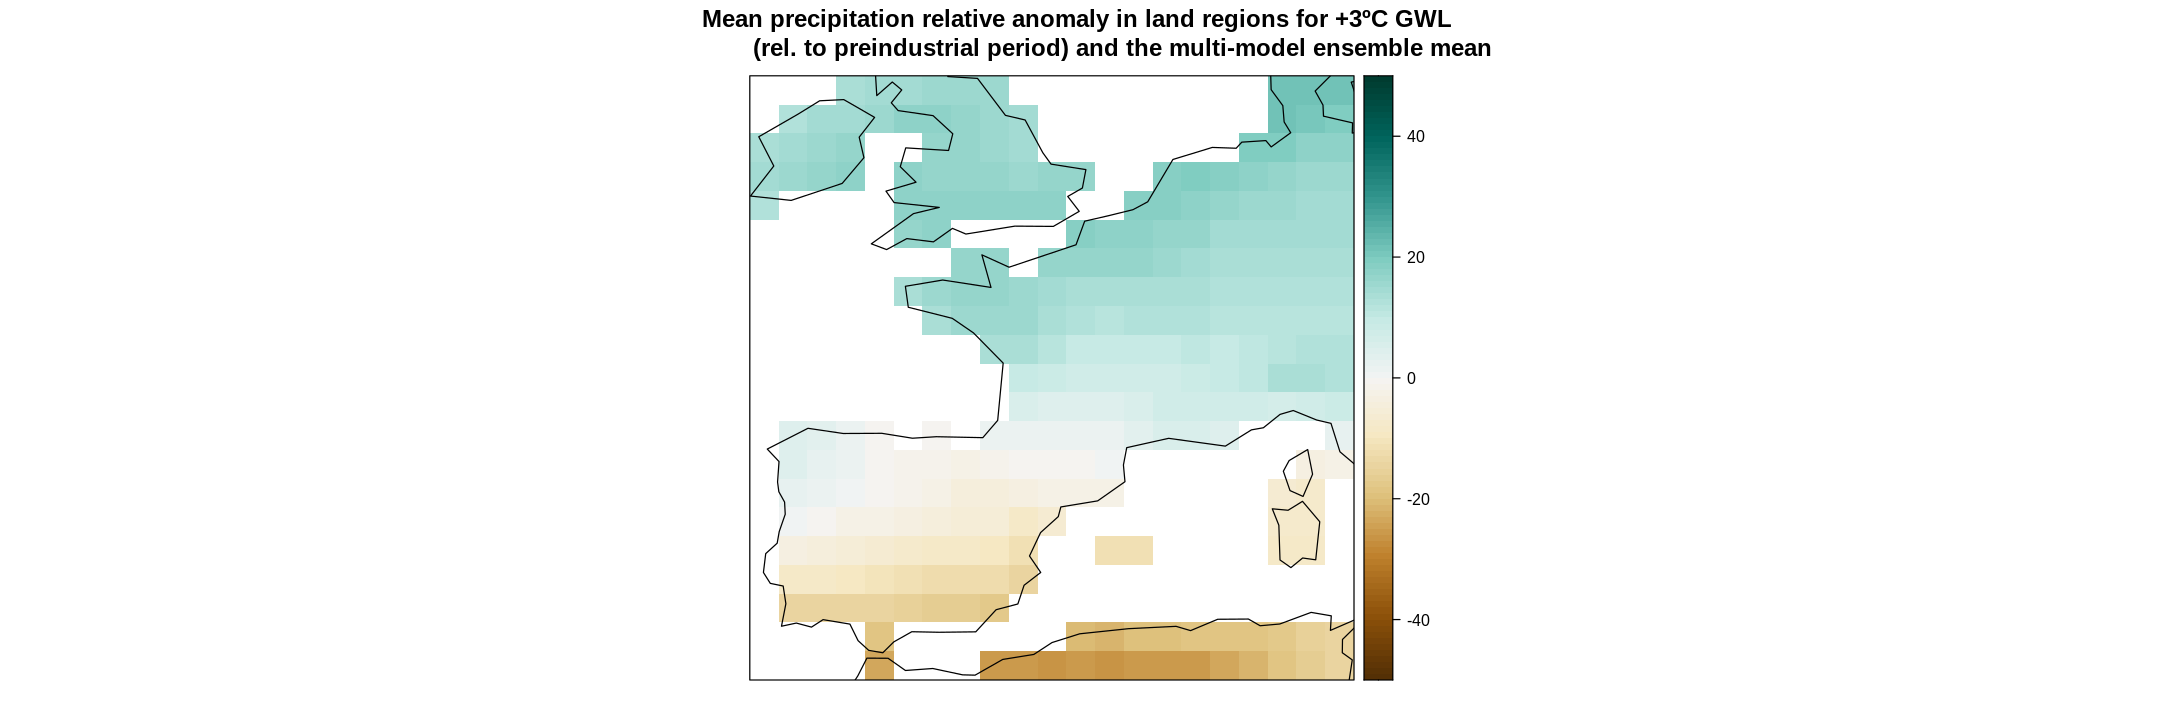

In [34]:
ens.mean.land <- gridArithmetics(ens.mean, mask, operator = "*")
spatialPlot(ens.mean.land, 
            backdrop.theme = "coastline", 
            at = seq(-50, 50, 1), 
            set.max = 50, set.min = -50, 
            color.theme = "BrBG",
            main = "Mean precipitation relative anomaly in land regions for +3ºC GWL 
            (rel. to preindustrial period) and the multi-model ensemble mean")

To apply the same mask to the multi-model grid, a trick can be employed to duplicate the mask for each member in the target grid:

In [35]:
multi.mask <- rep(list(mask), getShape(delta, "member")) %>% bindGrid(dimension = "member", skip.temporal.check = T)

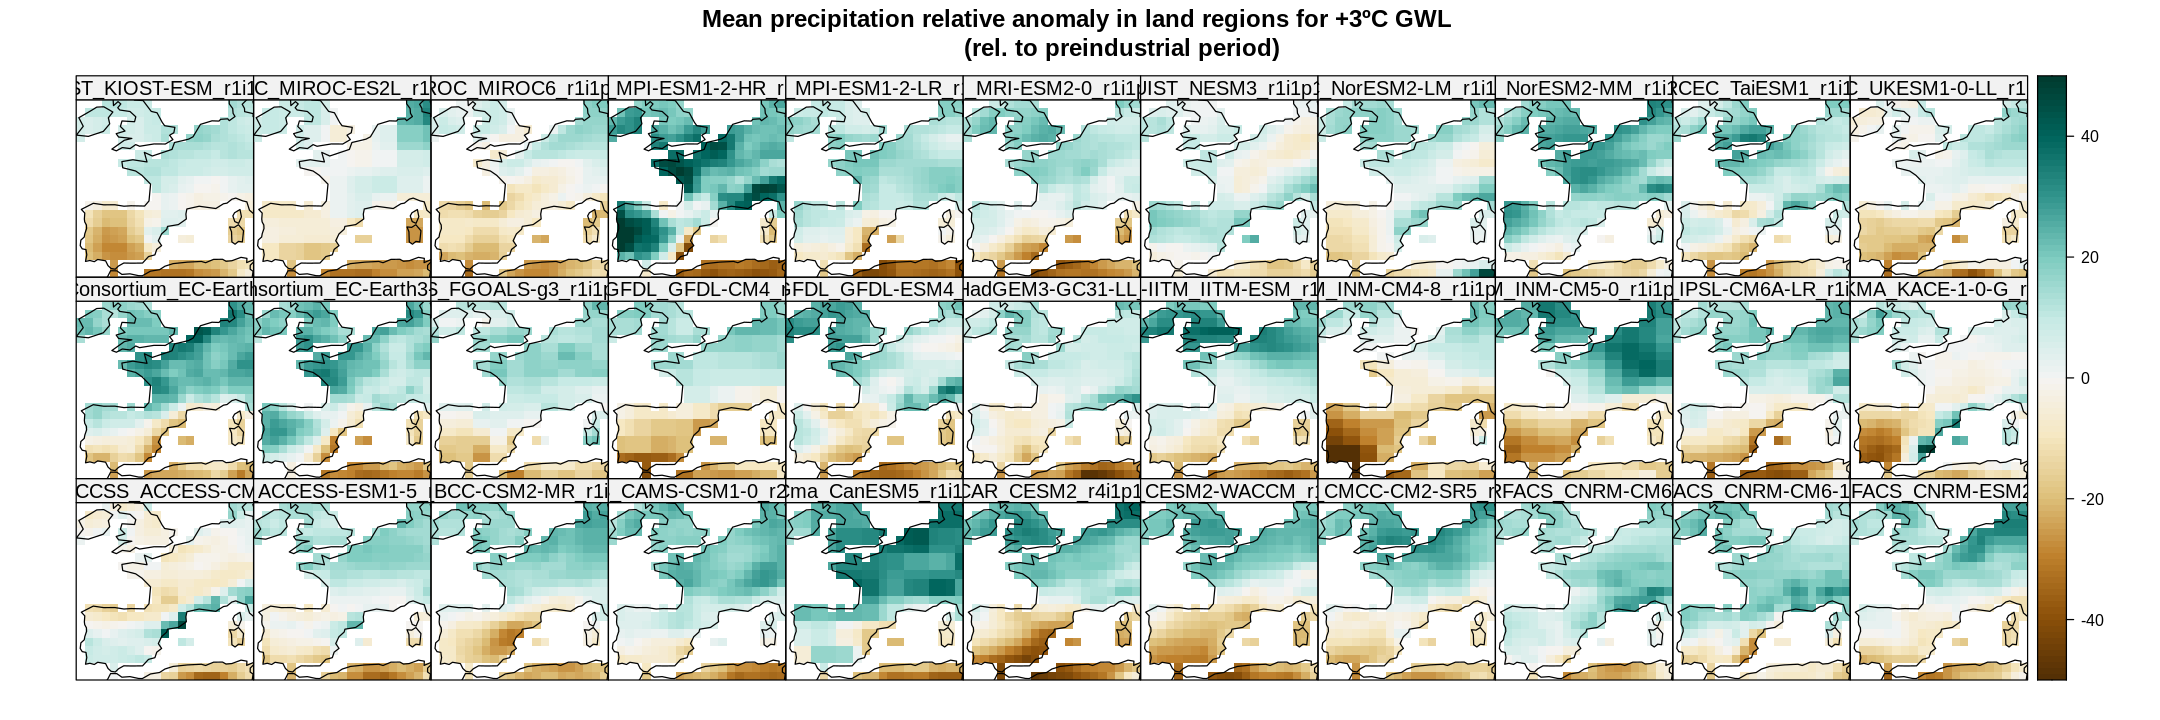

In [36]:
delta.rel.land <- gridArithmetics(delta.rel, multi.mask, operator = "*")
spatialPlot(delta.rel.land, 
            backdrop.theme = "coastline", 
            at = seq(-50, 50, 1), 
            set.max = 50, set.min = -50, 
            color.theme = "BrBG",
            layout = c(11, 3),
            main = "Mean precipitation relative anomaly in land regions for +3ºC GWL 
            (rel. to preindustrial period)",
            strip = strip.custom(factor.levels = delta.rel.land$Members))

### 7. Generate regionalized information

Here is an example of generating regional stripes. First, we aggregate the data yearly using the `aggregateGrid` function and calculate the historical climatology. Then, employing a similar approach to the one mentioned earlier, we duplicate the historical climatology for each time step in the future yearly data to ensure consistent array dimensions. This enables the calculation of year anomalies relative to the historical climatology using the `gridArithmetics` function. 

In [37]:
cmip6.ssp585.y <- aggregateGrid(cmip6.ssp585, aggr.y = list(FUN = "mean", na.rm = TRUE))
cmip6.hist.c <- climatology(cmip6.hist)
cmip6.hist.multi.year <- rep(list(cmip6.hist.c), getShape(cmip6.ssp585.y, "time")) %>% bindGrid(dimension = "time")
year.delta <- gridArithmetics(cmip6.ssp585.y, cmip6.hist.multi.year, operator = "-")
year.delta.rel <- gridArithmetics(year.delta, cmip6.hist.multi.year, 100, operator = c("/", "*"))

[2024-09-27 17:48:30.495045] Performing annual aggregation...

[2024-09-27 17:48:31.928117] Done.

[2024-09-27 17:48:31.945821] - Computing climatology...

[2024-09-27 17:48:32.050268] - Done.



To perform spatial aggregations we only need to apply the function `aggregateGrid` again but with the appropriate parameters.

In [38]:
regional.mean <- aggregateGrid(year.delta.rel, aggr.spatial = list(FUN = "mean", na.rm = TRUE))

Calculating areal weights...

[2024-09-27 17:48:32.19023] - Aggregating spatially...

[2024-09-27 17:48:32.210335] - Done.



The function `stripePlot` performs the same spatial aggregation internally and plots the stripes. 

Calculating areal weights...

[2024-09-27 17:48:32.226815] - Aggregating spatially...

[2024-09-27 17:48:32.25095] - Done.



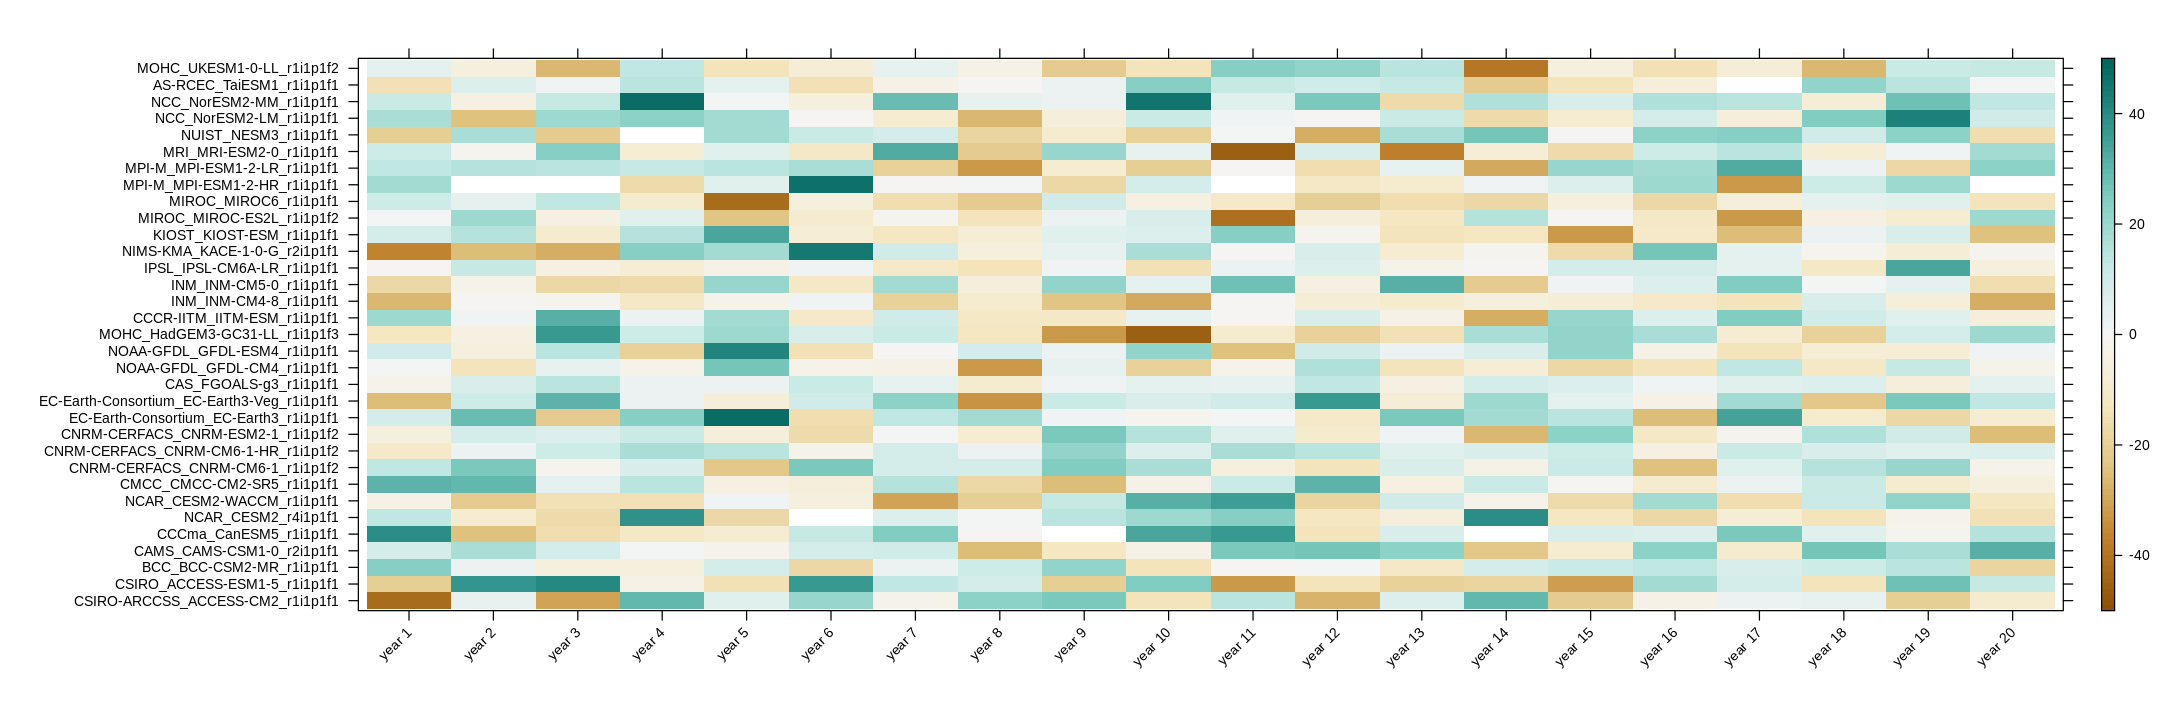

In [39]:
stripePlot(year.delta.rel, 
           aggr.spatial = list(FUN = "mean", na.rm = TRUE), 
           at = seq(-50, 50), 
           color.theme = "BrBG", 
           xlabels = paste("year", 1:20))

[2024-09-27 17:48:32.365813] Performing annual aggregation...

[2024-09-27 17:48:35.47329] Done.

Calculating areal weights...

[2024-09-27 17:48:35.48835] - Aggregating spatially...

[2024-09-27 17:48:35.529449] - Done.



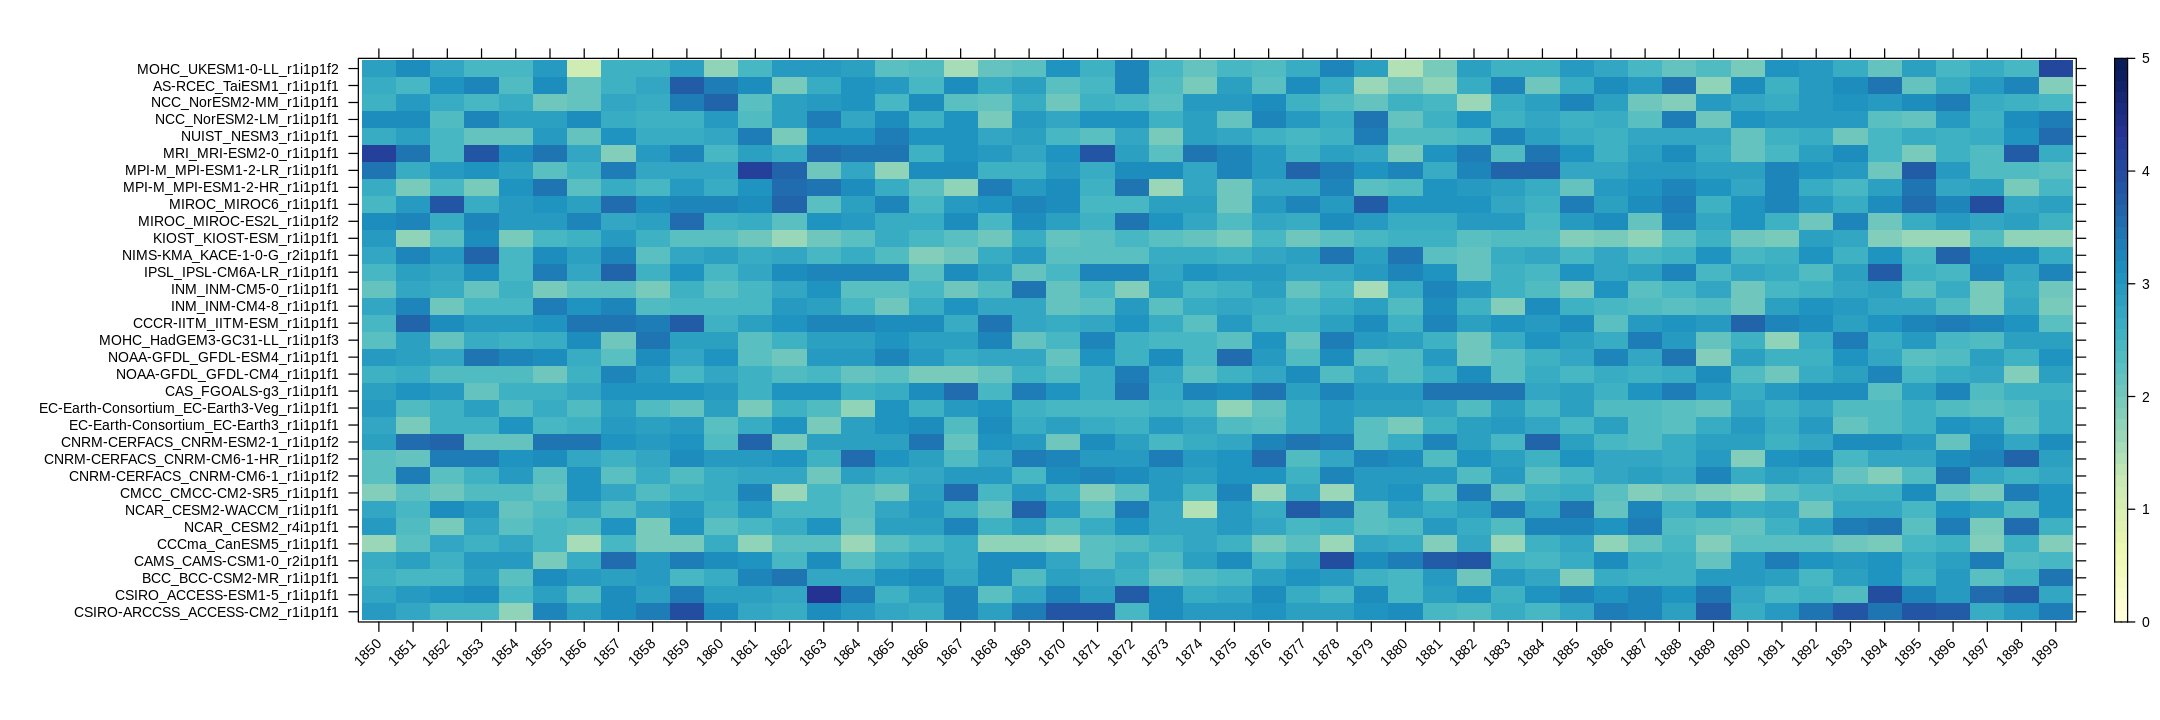

In [40]:
stripePlot(aggregateGrid(cmip6.hist, aggr.y = list(FUN = "mean", na.rm = TRUE)), at = seq(0, 5, 0.1), color.theme =  "YlGnBu")

### Session Info

In [41]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/zequi/miniconda3/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

time zone: Europe/Madrid
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] RColorBrewer_1.1-3  magrittr_2.0.3      lattice_0.22-6     
 [4] geoprocessoR_0.2.2  visualizeR_1.6.4    transformeR_2.2.2  
 [7] loadeR_1.8.2        climate4R.UDG_0.2.6 loadeR.java_1.1.1  
[10] rJ